## Q. 다음 분기에 어떤 게임을 설계해야 할까?

### Data Description
- Name : 게임의 이름
- Platform : 게임이 지원되는 플랫폼의 이름
- Year : 게임이 출시된 연도
- Genre : 게임의 장르
- Publisher : 게임을 제작한 회사
- NA_Sales : 북미지역에서의 출고량
- EU_Sales : 유럽지역에서의 출고량
- JP_Sales : 일본지역에서의 출고량
- Other_Sales : 기타지역에서의 출고량

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaed = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [3]:
df = pd.read_csv("vgames2.csv")

# 1. EDA
- 데이터 확인
- 결측치 확인
- 중복데이터 확인

In [4]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df.shape

(16598, 10)

In [6]:
# 'Unnamed: 0 컬럼' 삭제
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [9]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

- 다음 분기에 어떤 게임을 설계할지 파악하는 과정에서 연도와 장르 데이터는 중요하다고 생각한다. 이 두 컬럼에 임의로 데이터를 채웠을 경우 추후 분석하는 과정에서 오류가 발생할 수 있으므로 Year와 Genre의 결측값 처리는 제거하는 것으로 결정한다.

In [10]:
df_clean = df.copy()

In [11]:
# 'Year', 'Genre' 결측치가 있는 행 제거 & 인덱스 정리
df_clean = df_clean.dropna(subset=['Year'])
df_clean = df_clean.dropna(subset=['Genre'])
df_clean.reset_index(drop=True, inplace=True)

In [12]:
df_clean.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [13]:
df_clean.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7811,Disney Stitch Jam,DS,2009.0,Misc,Disney Interactive Studios,0.08,0,0.16,0
549,Pikmin 2,GC,2004.0,Strategy,Nintendo,0.48,0.13,0.56,0.03
5616,Air Traffic Chaos,DS,2007.0,Simulation,Ertain,0.05,0,0,0
13406,C.O.R.E.,DS,2009.0,Shooter,Graffiti,0.03,0,0,0
5852,Prince of Persia,X360,2008.0,Action,Ubisoft,0.54,0.35,0.02,0.1
12636,Tokimeki Memorial: Taisen Pazurudama,PS,1996.0,Puzzle,Konami Digital Entertainment,0,0,0.09,0.01
2621,Shrek SuperSlam,GC,2005.0,Action,Activision,0.17,0.04,0,0.01
14519,Simple DS Series Vol. 41: The Bakudan Shori-Han,DS,2008.0,Action,D3Publisher,0,0,0.01,0
6992,Monster Garage,XB,2004.0,Strategy,Activision Value,0.05,0.01,0,0
3373,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.6,2.15


In [14]:
# 'Publisher' 컬럼 결측치를 'Unknown'으로 대체
df_clean.fillna('Unknown', inplace=True)

In [15]:
df_clean.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [16]:
# 중복 데이터 확인
df_clean.duplicated().sum()

0

In [17]:
df_clean.shape

(16277, 9)

In [18]:
df_clean['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [19]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  object 
 6   EU_Sales     16277 non-null  object 
 7   JP_Sales     16277 non-null  object 
 8   Other_Sales  16277 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [21]:
df_clean.astype({'NA_Sales':'float'})

ValueError: ignored

- 데이터를 확인하였더니 출고량에 'K', 'M'과 같은 문자가 섞여있어 바로 float로 변환이 불가능하다. 문자를 제거해주는 작업 필요.

In [22]:
import re

def has_char(inputString):
    return bool(re.search('[a-zA-Z]', inputString))

In [23]:
NA = df_clean.NA_Sales.apply(has_char)
error_na = df_clean[NA]
error_na

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
440,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
451,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
...,...,...,...,...,...,...,...,...,...
16014,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16092,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09
16163,Super Robot Taisen F Kanketsuhen,SAT,98.0,Strategy,Banpresto,0M,0,0.55,0
16173,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [24]:
error_na.NA_Sales = error_na.NA_Sales.str.replace('[a-zA-Z]', '')
error_na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0,0.02,0,0
440,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58,0.47,0.01,0.1
451,F1 2010,PS3,2010.0,Racing,Codemasters,0.25,0.76,0.08,0.27
...,...,...,...,...,...,...,...,...,...
16014,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720,0.56,0,0.19
16092,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53,0.02,0,0.09
16163,Super Robot Taisen F Kanketsuhen,SAT,98.0,Strategy,Banpresto,0,0,0.55,0
16173,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470,0.18,0,0.12


In [25]:
# 출고량의 있는 문자 제거
df_clean.NA_Sales = df_clean.NA_Sales.str.replace('[a-zA-Z]', '')
df_clean.EU_Sales = df_clean.EU_Sales.str.replace('[a-zA-Z]', '')
df_clean.JP_Sales = df_clean.JP_Sales.str.replace('[a-zA-Z]', '')
df_clean.Other_Sales = df_clean.Other_Sales.str.replace('[a-zA-Z]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [26]:
df_clean = df_clean.astype({'NA_Sales':'float', 'EU_Sales':'float', 'JP_Sales':'float', 'Other_Sales':'float'})

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16277 entries, 0 to 16276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  float64
 6   EU_Sales     16277 non-null  float64
 7   JP_Sales     16277 non-null  float64
 8   Other_Sales  16277 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [28]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [29]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000
mean,1994.206365,2.185386,1.076418,0.545789,0.279517
std,155.313461,56.653435,32.057404,24.168394,7.313040
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,4100.000000,2560.000000,2780.000000,560.000000


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

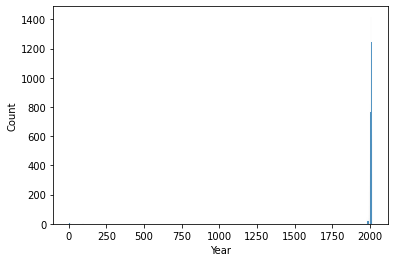

In [31]:
sns.histplot(x='Year', data=df_clean)

In [32]:
df_clean = df_clean[df_clean['Year']>1000]

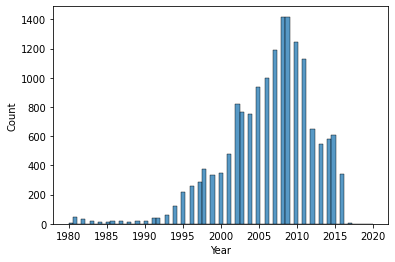

In [33]:
sns.histplot(x='Year', data=df_clean)

In [34]:
# Year < 1000 인 데이터는 제거하였으므로 인덱스 재정리
df_clean.reset_index(drop=True, inplace=True)

In [35]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16177.000000,16177.000000,16177.000000,16177.000000,16177.000000
mean,2006.407245,2.196599,1.082102,0.548348,0.280937
std,5.827320,56.828016,32.156236,24.242917,7.335579
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,4100.000000,2560.000000,2780.000000,560.000000


In [36]:
# 모든 출고량이 0인 행 
# -> 제거하고자 하였으나 모든 나라에 출고량이 0인 데이터도 의미가 있을 것이라 판단하여 제거하지 않기로 함.
df_clean[(df_clean['NA_Sales']==0) & (df_clean['EU_Sales']==0) & (df_clean['JP_Sales']==0) & (df_clean['Other_Sales']==0)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5460,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.0,0.0,0.0,0.0


In [37]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16177.000000,16177.000000,16177.000000,16177.000000,16177.000000
mean,2006.407245,2.196599,1.082102,0.548348,0.280937
std,5.827320,56.828016,32.156236,24.242917,7.335579
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,4100.000000,2560.000000,2780.000000,560.000000


In [45]:
# 출고량의 상위 1% 값
ns = df_clean['NA_Sales'].quantile(0.99)
es = df_clean['EU_Sales'].quantile(0.99)
js = df_clean['JP_Sales'].quantile(0.99)
os = df_clean['Other_Sales'].quantile(0.99)

print("<상위 1%값>\nNA_Sales: {}\nEU_Sales: {}\nJP_Sales: {}\nOther_Sales: {}".format(ns, es, js, os))

<상위 1%값>
NA_Sales: 3.7095999999999916
EU_Sales: 2.46
JP_Sales: 1.45
Other_Sales: 0.77


In [49]:
less_ns = df_clean[df_clean.NA_Sales < ns]
larger_ns = df_clean[df_clean.NA_Sales >= ns]

In [50]:
len(less_ns), len(larger_ns)

(16015, 162)

In [52]:
len(larger_ns) / len(less_ns)

0.010115516703090853

- NA_Sales 의 값을 상위 1% 인 것들을 이상치로 볼까 하였으나 0.01011이라는 값이 생각보다 크다고 판단하여 히스토그램을 줄여가며 파악하기로 함.

(array([1.6157e+04, 1.0000e+01, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.,  410.,  820., 1230., 1640., 2050., 2460., 2870., 3280.,
        3690., 4100.]),
 <a list of 10 Patch objects>)

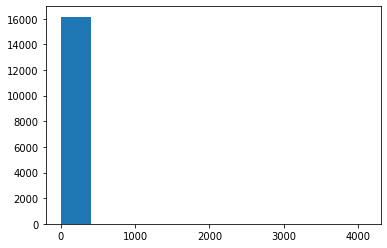

In [53]:
plt.hist(df_clean.NA_Sales)

(array([1.613e+04, 1.400e+01, 5.000e+00, 7.000e+00, 1.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([  0.,  82., 164., 246., 328., 410., 492., 574., 656., 738., 820.]),
 <a list of 10 Patch objects>)

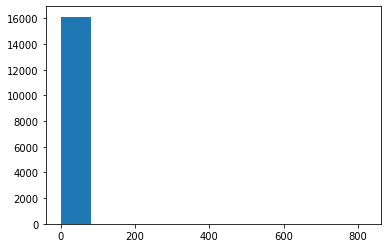

In [54]:
plt.hist(df_clean.NA_Sales[df_clean.NA_Sales < 1000])

(array([1.6087e+04, 1.9000e+01, 7.0000e+00, 4.0000e+00, 3.0000e+00,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <a list of 10 Patch objects>)

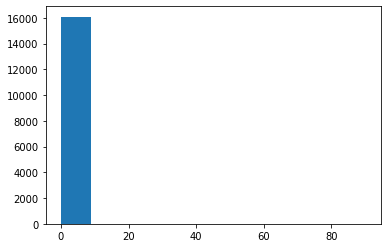

In [56]:
plt.hist(df_clean.NA_Sales[df_clean.NA_Sales < 100])

(array([1.5216e+04, 5.6900e+02, 1.7600e+02, 6.3000e+01, 2.7000e+01,
        1.1000e+01, 1.5000e+01, 5.0000e+00, 4.0000e+00, 1.0000e+01]),
 array([0.   , 0.981, 1.962, 2.943, 3.924, 4.905, 5.886, 6.867, 7.848,
        8.829, 9.81 ]),
 <a list of 10 Patch objects>)

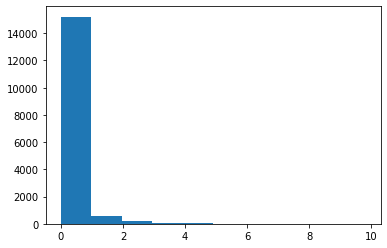

In [58]:
plt.hist(df_clean.NA_Sales[df_clean.NA_Sales < 10])

(array([13537.,  1393.,   489.,   246.,   135.,    92.,    54.,    37.,
           24.,    18.]),
 array([0.   , 0.398, 0.796, 1.194, 1.592, 1.99 , 2.388, 2.786, 3.184,
        3.582, 3.98 ]),
 <a list of 10 Patch objects>)

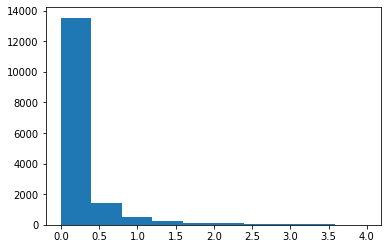

In [61]:
plt.hist(df_clean.NA_Sales[df_clean.NA_Sales < 4])

In [62]:
less_4 = df_clean[df_clean.NA_Sales < 4]
larger_4 = df_clean[df_clean.NA_Sales >= 4]

In [63]:
len(less_4), len(larger_4)

(16025, 152)

In [64]:
len(larger_4) / len(less_4)

0.009485179407176287

In [82]:
# Global_Sales 컬럼 생성
df_clean['Global_Sales'] = df_clean.iloc[:,5:].sum(axis=1)

In [84]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


(array([1.6144e+04, 1.7000e+01, 5.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.  ,  410.35,  820.7 , 1231.05, 1641.4 , 2051.75, 2462.1 ,
        2872.45, 3282.8 , 3693.15, 4103.5 ]),
 <a list of 10 Patch objects>)

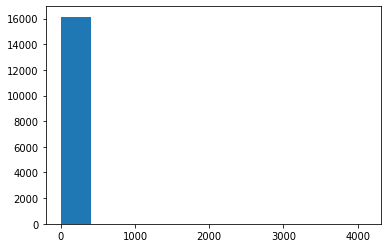

In [85]:
plt.hist(df_clean.Global_Sales)

(array([1.6085e+04, 2.8000e+01, 1.9000e+01, 1.2000e+01, 5.0000e+00,
        5.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  0.   ,  96.067, 192.134, 288.201, 384.268, 480.335, 576.402,
        672.469, 768.536, 864.603, 960.67 ]),
 <a list of 10 Patch objects>)

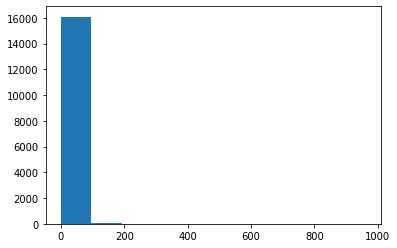

In [86]:
plt.hist(df_clean.Global_Sales[df_clean.Global_Sales <1000])

(array([1.5958e+04, 5.8000e+01, 3.7000e+01, 1.5000e+01, 1.7000e+01,
        5.0000e+00, 1.2000e+01, 5.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  0.   ,  19.727,  39.454,  59.181,  78.908,  98.635, 118.362,
        138.089, 157.816, 177.543, 197.27 ]),
 <a list of 10 Patch objects>)

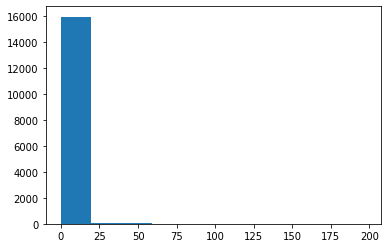

In [87]:
plt.hist(df_clean.Global_Sales[df_clean.Global_Sales <200])

(array([1.5771e+04, 1.4200e+02, 3.8000e+01, 2.8000e+01, 1.1000e+01,
        2.0000e+01, 5.0000e+00, 1.6000e+01, 0.0000e+00, 2.2000e+01]),
 array([ 0.   ,  5.078, 10.156, 15.234, 20.312, 25.39 , 30.468, 35.546,
        40.624, 45.702, 50.78 ]),
 <a list of 10 Patch objects>)

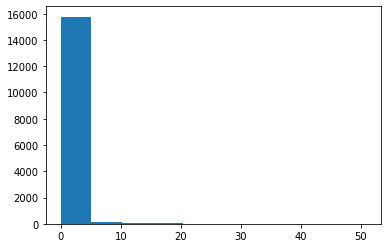

In [88]:
plt.hist(df_clean.Global_Sales[df_clean.Global_Sales <60])

(array([1.5492e+04, 3.2400e+02, 6.9000e+01, 4.7000e+01, 1.5000e+01,
        9.0000e+00, 2.3000e+01, 9.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([ 0.   ,  2.901,  5.802,  8.703, 11.604, 14.505, 17.406, 20.307,
        23.208, 26.109, 29.01 ]),
 <a list of 10 Patch objects>)

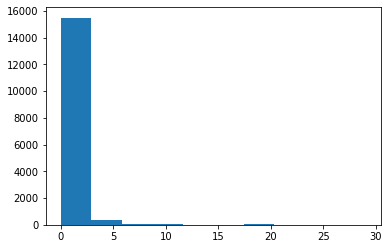

In [112]:
plt.hist(df_clean.Global_Sales[df_clean.Global_Sales <30])

(array([1.5364e+04, 3.9700e+02, 1.0600e+02, 3.2000e+01, 4.0000e+01,
        1.1000e+01, 6.0000e+00, 2.0000e+00, 2.8000e+01, 4.0000e+00]),
 array([ 0.   ,  2.475,  4.95 ,  7.425,  9.9  , 12.375, 14.85 , 17.325,
        19.8  , 22.275, 24.75 ]),
 <a list of 10 Patch objects>)

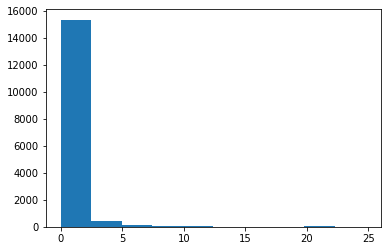

In [113]:
plt.hist(df_clean.Global_Sales[df_clean.Global_Sales < 25])

In [114]:
# Global_Sales를 히스토그램으로 확인해가며 이상치를 제거하였을 때
less_25 = df_clean[df_clean.Global_Sales < 25]
larger_25 = df_clean[df_clean.Global_Sales >= 25]

In [115]:
len(less_25), len(larger_25)

(15990, 187)

In [116]:
len(larger_25) / len(less_25)

0.011694809255784866

In [117]:
# Global_Sales의 상위 1%를 이상치로 보고 제거하였을 때
gs = df_clean['Global_Sales'].quantile(0.99)

In [118]:
less_gs = df_clean[df_clean.Global_Sales < gs]
larger_gs = df_clean[df_clean.Global_Sales >= gs]

print(len(less_gs), len(larger_gs))
print(len(larger_gs) / len(less_gs))

16015 162
0.010115516703090853


- Global_Sales의 이상치를 제거하기 위해서 히스토그램과 상위 1%의 값을 사용하였다.
- 히스토그램을 보며 정한 값과 상위 1%의 값을 이상치로 보았을 때의 비율이 크게 차이는 나지 않지만 히스토그램은 눈대중으로 정한 값이므로 상위 1%의 값을 사용하는 것이 논리적이라고 판단하여 그 값을 이상치의 기준으로 결정하였다.

In [121]:
df_clean = df_clean.drop(index = df_clean[df_clean.Global_Sales >= gs].index).reset_index(drop=True)

(array([1.5573e+04, 2.6800e+02, 5.8000e+01, 4.3000e+01, 1.3000e+01,
        3.0000e+00, 3.0000e+01, 2.0000e+00, 3.0000e+00, 2.2000e+01]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <a list of 10 Patch objects>)

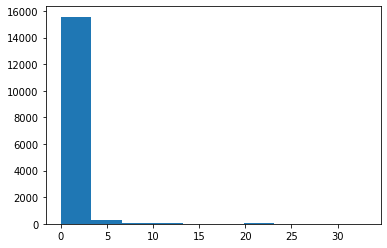

In [123]:
plt.hist(df_clean.Global_Sales)

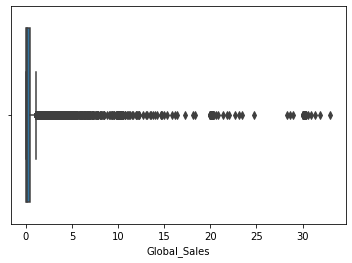

In [124]:
sns.boxplot(x=df_clean.Global_Sales);

In [136]:
# 5 이상의 데이터가 이상치로 볼 수 있을 만큼 적다.
len(df_clean[df_clean.Global_Sales > 5]), len(df_clean[df_clean.Global_Sales <= 5])

(249, 15766)

(array([12128.,  1838.,   785.,   403.,   219.,   140.,    90.,    71.,
           59.,    33.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

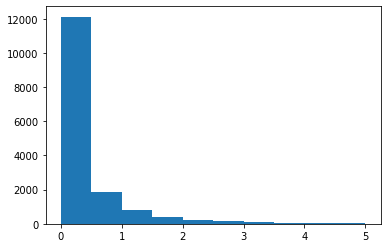

In [138]:
plt.hist(df_clean.Global_Sales[df_clean.Global_Sales <= 5])

In [142]:
# 다시 한번 더 이상치 제거
df_clean = df_clean.drop(index = df_clean[df_clean.Global_Sales >= 5].index).reset_index(drop=True)

In [143]:
df_clean.Global_Sales.describe()

count    15765.000000
mean         0.415041
std          0.660070
min          0.000000
25%          0.060000
50%          0.160000
75%          0.450000
max          4.990000
Name: Global_Sales, dtype: float64

In [144]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,15765.000000,15765.000000,15765.000000,15765.000000,15765.000000,15765.000000
mean,2006.427529,0.205761,0.110397,0.061950,0.036933,0.415041
std,5.805277,0.367357,0.239855,0.199668,0.094256,0.660070
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.160000
75%,2010.000000,0.230000,0.100000,0.030000,0.030000,0.450000
max,2020.000000,4.210000,3.750000,4.870000,2.930000,4.990000


#### 지역에 따라서 선호하는 게임 장르가 다를까?

In [145]:
df_clean.groupby('Genre')['NA_Sales'].sum().sort_values()

Genre
Strategy         60.64
Puzzle           80.61
Adventure        90.90
Simulation      153.58
Fighting        188.23
Role-Playing    215.61
Platform        247.49
Racing          267.48
Misc            314.26
Shooter         363.59
Sports          557.31
Action          704.12
Name: NA_Sales, dtype: float64

In [146]:
df_clean.groupby('Genre')['EU_Sales'].sum().sort_values()

Genre
Puzzle           38.15
Strategy         40.82
Adventure        59.00
Simulation       79.92
Fighting         85.79
Role-Playing    104.15
Platform        118.83
Misc            157.90
Racing          170.62
Shooter         204.57
Sports          276.48
Action          404.18
Name: EU_Sales, dtype: float64

In [132]:
df_clean.groupby('Genre')['JP_Sales'].sum().sort_values()

Genre
Shooter          36.93
Strategy         47.90
Racing           50.84
Puzzle           56.19
Simulation       92.07
Fighting        104.36
Adventure       111.51
Platform        120.45
Sports          130.52
Misc            133.48
Action          211.58
Role-Playing    330.74
Name: JP_Sales, dtype: float64

In [133]:
df_clean.groupby('Genre')['Other_Sales'].sum().sort_values()

Genre
Puzzle           12.39
Strategy         40.97
Fighting         45.54
Simulation       50.23
Platform         69.37
Adventure        96.45
Racing          101.50
Shooter         118.81
Misc            131.41
Sports          131.75
Role-Playing    133.69
Action          300.02
Name: Other_Sales, dtype: float64

In [252]:
# 장르별 각 나라의 출고량을 시각화하기 위한 데이터프레임 생성
genre_sales = df_clean.groupby('Genre').sum().drop(['Year', 'Global_Sales'], axis=1)
genre_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,704.12,404.18,132.39,136.06
Adventure,90.90,59.00,48.49,15.59
Fighting,188.23,85.79,69.49,32.62
Misc,314.26,157.90,89.95,57.09
Platform,247.49,118.83,66.58,33.23
Puzzle,80.61,38.15,41.81,9.71
Racing,267.48,170.62,26.60,52.95
Role-Playing,215.61,104.15,255.15,40.18
Shooter,363.59,204.57,31.12,65.04


In [259]:
genre_sales.T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,704.12,90.90,188.23,314.26,247.49,80.61,267.48,215.61,363.59,153.58,557.31,60.64
EU_Sales,404.18,59.00,85.79,157.90,118.83,38.15,170.62,104.15,204.57,79.92,276.48,40.82
JP_Sales,132.39,48.49,69.49,89.95,66.58,41.81,26.60,255.15,31.12,48.49,119.61,46.96
Other_Sales,136.06,15.59,32.62,57.09,33.23,9.71,52.95,40.18,65.04,24.30,104.94,10.54


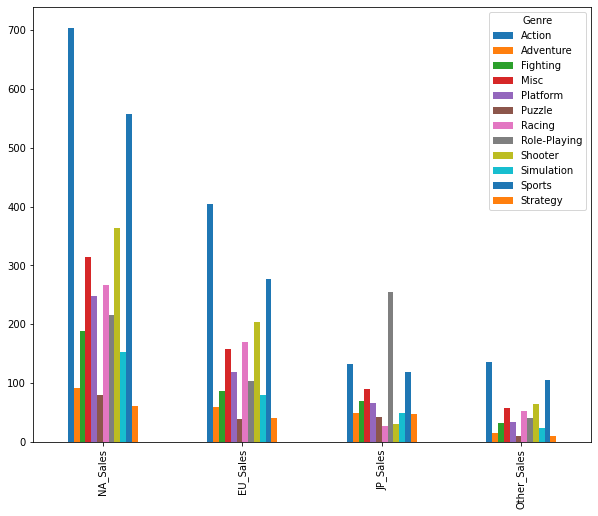

In [264]:
genre_sales.T.plot(kind='bar', figsize=(10,8))

#### 연도별 게임의 트렌드가 있을까?

In [266]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [277]:
df_clean[df_clean.Year==1980]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5454,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
5664,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
6965,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.23
8775,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
9620,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
12466,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
13546,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
14260,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
